# Generate numpy data files for characteristic output

These models should be solved rather fast. It may be best to just have a function that calls that takes in the parameters and spits out the active tension. 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [23]:
import land.land2017 as land
import rice.rice_model_2008 as rice

We want to extract the active tension from these models. When it comes to the rice model there is only one active force that we should use. The land model has two versions of an "active" force- Ta and Ttot. Ttot I believe includes dissipative forces due to viscosity. 

In [37]:
t = np.linspace(0,100,101)
Cai = np.linspace(0,10,101)
rforce_index = rice.monitor_indices("active")

lforce_index = land.monitor_indices("Ta") # Could also be "Ttot"
lforced_index = land.monitor_indices("Ttot")

In [38]:
init = land.init_state_values()
p = (land.init_parameter_values(),)
s = odeint(land.rhs, init, t, p)

In [39]:
tas = np.zeros_like(t)
tds = np.zeros_like(t)
for i in range(101):
    m = land.monitor(s[i],t[-1],p[0])
    tas[i] = m[lforce_index]
    tds[i] = m[lforced_index]
    

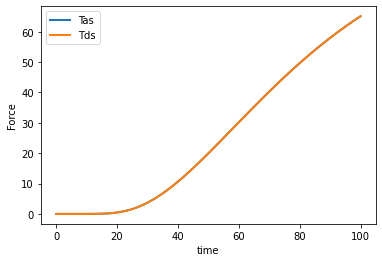

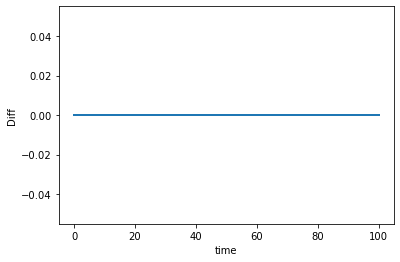

In [42]:
plt.plot(t,tas,lw=2,label="Tas")
plt.plot(t,tds,lw=2,label="Tds")
plt.xlabel("time")
plt.ylabel("Force")
plt.legend()
plt.figure()
plt.plot(t,tas-tds, lw=2,label="Diff")
plt.xlabel("time")
plt.ylabel("Diff");

# ARGH--- Python subdirectory structure!

Currently we can only run the land model because of the annoying subdirectory import. I have to figure out how to get the hierarchies to work out.

In [24]:


SL = 1.85
init = rice.init_state_values(SL=SL)
p = (rice.init_parameter_values(start_time=1000,Ca_diastolic=0,SLmin=2.5),)
s = odeint(rice.rhs,init,t,p)
    
    

ModuleNotFoundError: No module named 'modelparameters'

In [ ]:
m = rice.monitor(s[-1],t[-1],p[0])
Fss[i] = m[force_index]
